# Bayesian Network

## Sample problem:

Coal mining disasters in UK from 1851 to 1962.

- $D_t$: Numbber of disasteres in year $t$.
- $r_t$: The rate parameter of the Poisson distribution of disasters in year $t$
- $s$: The year in which the rate parameter changes (switching point).
- $e$: The rate parameter before switchpoint $s$.
- $l$: The rate parameter after the switchpoint $s$.
- $t_l$, $t_h$: The lower and upper boundaries of year $t$.
- $r_e$, $r_l$: The rate parameters of the priors of the early and late rates, respectively.



In [7]:
from pymc.examples.disaster_model import disasters_array
import matplotlib.pyplot as plt
%matplotlib inline

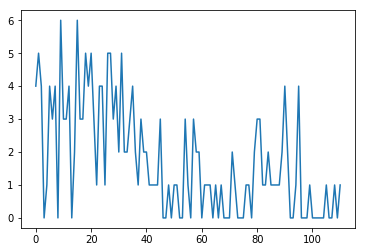

In [14]:
plt.plot(disasters_array)
plt.show()

$D_t$ is the observed variable and $s$, $e$, $r$ and $l$ are hidden variables.


There are 2 types of variables in ```PyMC```:
- ```Stochastic```: The variables that in nature is a stochastic random variable
- ```Deterministic```: The variables that intrinsitcly are deterministic

$r$ is the only ```Deterministic``` variable in this case. As if we know $s$, $e$ and $l$ we can get $r$ exactly.

## Inference of hidden variables

In [65]:
import disaster_model
from pymc import MCMC

In [66]:
M = MCMC(disaster_model)

In [67]:
type(M)

pymc.MCMC.MCMC

In [68]:
M.sample(iter=10000, burn=1000, thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.2 sec

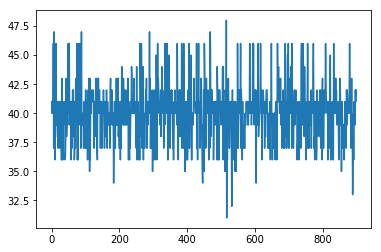

In [69]:
plt.plot(M.trace('switchpoint')[:])
plt.show()

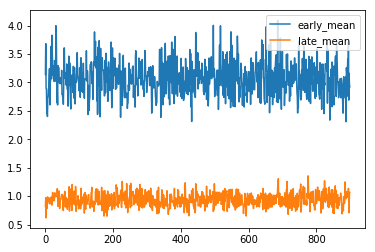

In [70]:
plt.plot(M.trace('early_mean')[:])
plt.plot(M.trace('late_mean')[:])
plt.legend(['early_mean', 'late_mean'])
plt.show()


Plotting switchpoint
Plotting early_mean
Plotting late_mean


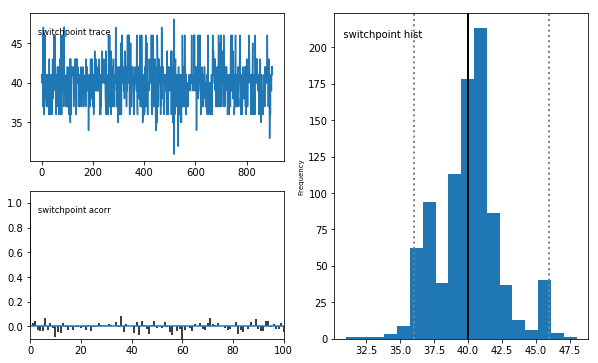

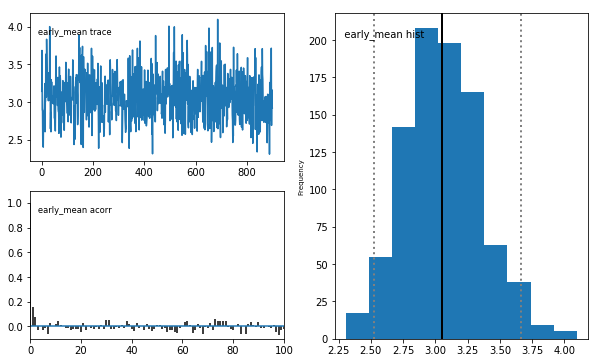

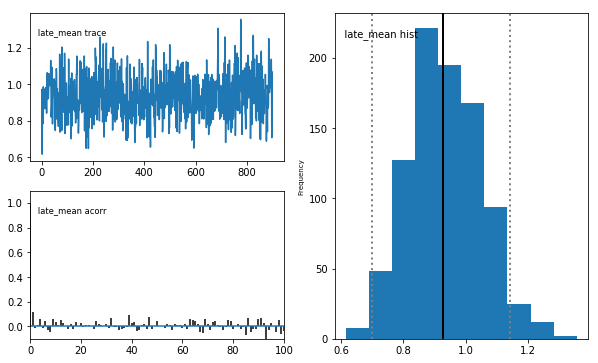

In [71]:
from pymc.Matplot import plot
plot(M)

In [72]:
import disaster_model
from pymc import MAP
M = MAP(disaster_model)
M.fit()

In [85]:
M.late_mean.value

array(0.90140842)